<b><h1>Objective:</h1></b>To bifurcate the domain of cancer patients into the group of patients who post operation survived for 5 or more years and the group of patients who died within 5 years.We will be using haberman dataset for the analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [2]:
haberman = pd.read_csv("haberman.csv")

Total number of datapoints = 306

In [3]:
print(haberman.shape)

(306, 4)


Total number of variables or features = 4<br>

In [4]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


Variable information:<br> 1.Age : Age of patients<br> 2.Year : Year they got opearated<br> 3.Nodes : Number of cancerous nodes they had<br> 4.Status: 1- If patients survived for 5 or more years 2- If patients died within 5 years 

In [5]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

count of patients who survived for 5 or more years : 225<br>count of patients who died within 5 years : 81

<h1><b>2D Scatter Plot</b></h1>

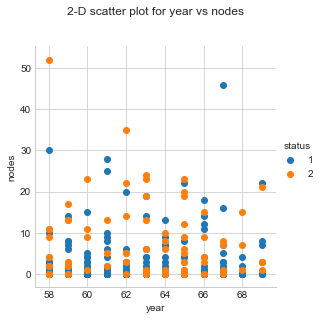

In [80]:
sns.set_style("whitegrid");
g = sns.FacetGrid(haberman,hue='status',size=4);
g.map(plt.scatter,"year","nodes")
g.fig.suptitle("2-D scatter plot for year vs nodes",y=1.1)
g.add_legend()
plt.show()

<b>Observation:</b><br>In the scatter plot above we cannot see any clear demarcation between status 1 and 2 . Hence, we cannot predict the survival status accurately based on the year of operation and the number of nodes a patient had.

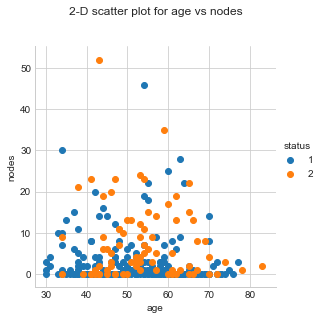

In [81]:
sns.set_style("whitegrid");
g = sns.FacetGrid(haberman,hue='status',size=4);
g.map(plt.scatter,"age","nodes")
g.fig.suptitle("2-D scatter plot for age vs nodes",y=1.1)
g.add_legend()
plt.show()

<b>Observation:</b><br>In the scatter plot above we cannot see any clear demarcation between status 1 and 2 . Hence, we cannot predict the survival status accurately based on the age of the patient and the number of nodes he had

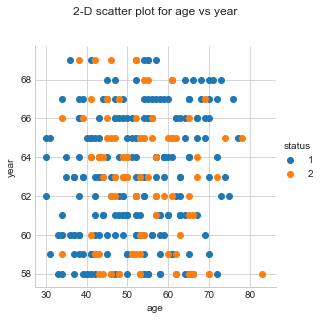

In [82]:
sns.set_style("whitegrid");
g = sns.FacetGrid(haberman,hue='status',size=4);
g.map(plt.scatter,"age","year")
g.fig.suptitle("2-D scatter plot for age vs year",y=1.1)
g.add_legend()
plt.show()

<b>Observation:</b><br>In the scatter plot above we cannot see any clear demarcation between status 1 and 2 . Hence, we cannot predict the survival status accurately based on the age of the patient and the year in which he/she underwent operation.

<h1><b>Pair-Plot</b></h1>

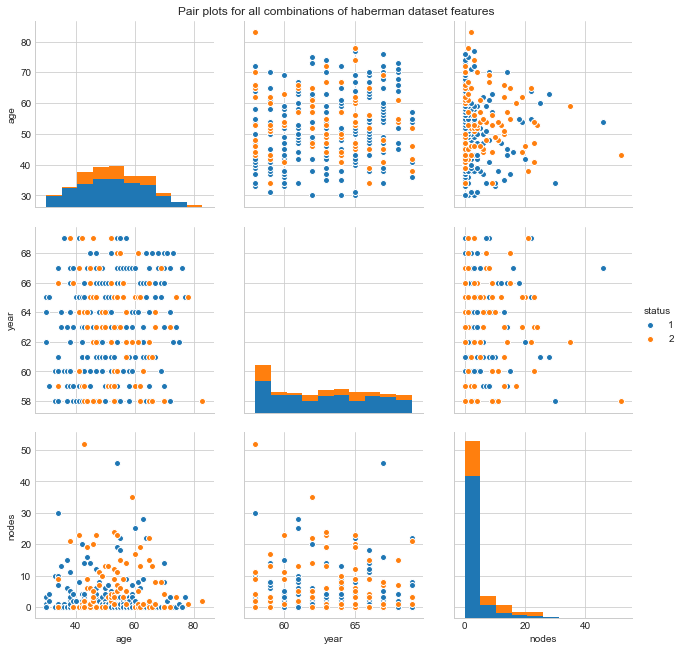

In [84]:
plt.close();
sns.set_style("whitegrid");
g = sns.pairplot(haberman,hue="status",vars=['age','year','nodes'],size=3);
g.fig.suptitle("Pair plots for all combinations of haberman dataset features",y=1)
plt.show();

<b>Observations:</b><br>1. Plots above and below the diagonal PDF plots are same but with x and y axis interchnaged. So in total we have 3 distinct plots.<br>2. Since we have so many overlapping points in all the plots so it is difficult to draw a clear divide between two status based on any combination of variables. 

<h1><b>1-D Scatter Plot</b></h1>

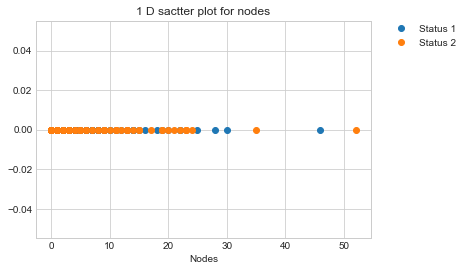

In [25]:
import numpy as np 
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];
plt.title("1 D sactter plot for nodes")
plt.xlabel("Nodes")
plt.plot(haberman_1["nodes"], np.zeros_like(haberman_1['nodes']), 'o',label="Status 1")
plt.plot(haberman_2["nodes"], np.zeros_like(haberman_2['nodes']), 'o',label="Status 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()


<b>Observations:</b><br> 1. Here in 1 D scatter plot we have plotted nodes against 0<br>2. In this case we can see there are lots of overlapping status points , hence an accurate demarcation between patients of 2 groups is not possible in this case.

<b><h1>PDF</h1></b>

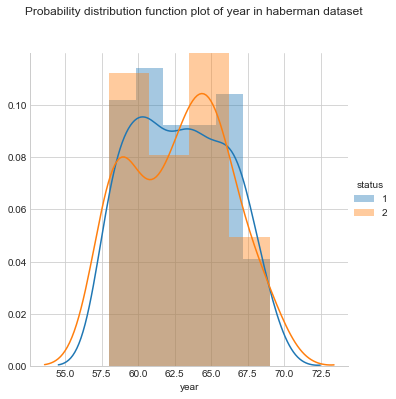

In [46]:
g = sns.FacetGrid(haberman,hue='status',size=5)
g.fig.suptitle("Probability distribution function plot of year in haberman dataset",y=1.1,fontsize=12)
g.map(sns.distplot,"year")
g.add_legend()
plt.show();

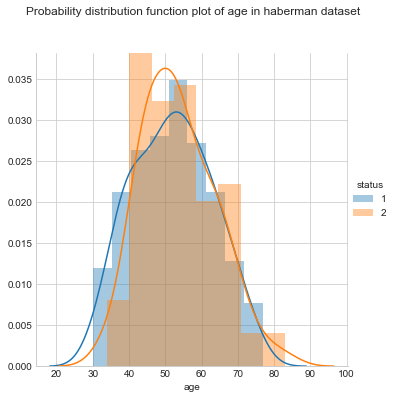

In [42]:
g = sns.FacetGrid(haberman,hue='status',size=5)
g.fig.suptitle("Probability distribution function plot of age in haberman dataset",y=1.1,fontsize=12)
g.map(sns.distplot,"age")
g.add_legend()
plt.show();

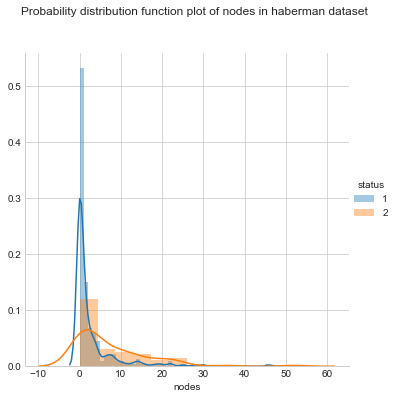

In [43]:
g = sns.FacetGrid(haberman,hue='status',size=5)
g.fig.suptitle("Probability distribution function plot of nodes in haberman dataset",y=1.1,fontsize=12)
g.map(sns.distplot,"nodes")
g.add_legend()
plt.show();

<b>Observations:</b><br>1. Out of the 3 plots given above we can draw some meaningful conclusion from the third PDF where nodes are on the x axis.<br>2. If number of nodes in a patient is 3 or less then her probability of living beyond 5 years post operation is higher.<br>3. In case the number of nodes is 0 then chances of survival for the patient is much higher as compared to other cases.<br>

<B><h1>CDF</h1></B>

Text(0,0.5,'Probability')

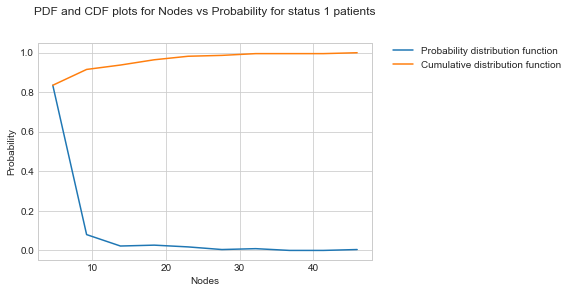

In [79]:
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("PDF and CDF plots for Nodes vs Probability for status 1 patients",y=1.1)
plt.plot(bin_edges[1:],pdf,label="Probability distribution function");
plt.plot(bin_edges[1:], cdf,label="Cumulative distribution function")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel("Nodes")
plt.ylabel("Probability")

<b>Observations:</b><br>1. We will use nodes for CDF analysis.The first plot corressponds to the patients who have survived beyond 5 years. In that plot we can observe that almost 100 % or all patients had nodes equivalent to 40 or less.<br>2.About 82% of patients who have survived beyond 5 years after operation had number of nodes 4 or less.

Text(0,0.5,'Probability')

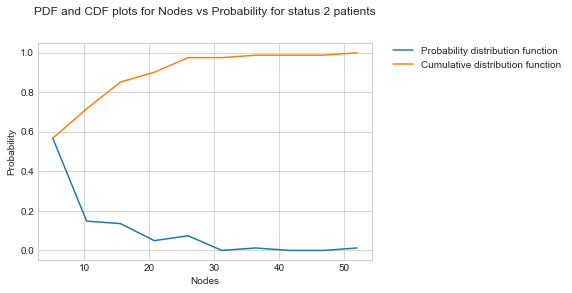

In [78]:
counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("PDF and CDF plots for Nodes vs Probability for status 2 patients",y=1.1)
plt.plot(bin_edges[1:],pdf,label="Probability distribution function");
plt.plot(bin_edges[1:], cdf,label="Cumulative distribution function")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel("Nodes")
plt.ylabel("Probability")

<b>Observations:</b><br>1. We will use nodes for CDF analysis.The second plot corressponds to the patients who have died within 5 years. In that plot we can observe that almost 100 % or all patients had nodes equivalent to 50 or less.<br>2.About 58% of patients who have died within 5 years after operation had number of nodes 6 or less.

<B><H1>Box-Plots</H1></B>

In [99]:
print("Mean number of nodes in case of patients who have survived for 5 years or longer :")
print(np.mean(haberman_1["nodes"]))
print("Mean with an outlier value of 100 nodes:")
print(np.mean(np.append(haberman_1["nodes"],100)));
print("Mean number of nodes in case of patients who have died within 5 years :")
print(np.mean(haberman_2["nodes"]))
print("Mean with an outlier value of 100 nodes:")
print(np.mean(np.append(haberman_2["nodes"],100)));
print("\nStd-dev:");
print(np.std(haberman_1["nodes"]))
print(np.std(haberman_2["nodes"]))

Mean number of nodes in case of patients who have survived for 5 years or longer :
2.7911111111111113
Mean with an outlier value of 100 nodes:
3.2212389380530975
Mean number of nodes in case of patients who have died within 5 years :
7.45679012345679
Mean with an outlier value of 100 nodes:
8.585365853658537

Std-dev:
5.857258449412131
9.128776076761632


In [107]:
print("Median number of nodes in case of patients who have survived for 5 years or longer :")
print(np.median(haberman_1["nodes"]))
print("Median number of nodes in case of patients who have died within 5 years : ")
print(np.median(haberman_2["nodes"]))

print("\nQuantiles:")
print(np.percentile(haberman_1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_1["nodes"],90))
print(np.percentile(haberman_2["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["nodes"]))
print(robust.mad(haberman_2["nodes"]))

Median number of nodes in case of patients who have survived for 5 years or longer :
0.0
Median number of nodes in case of patients who have died within 5 years : 
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


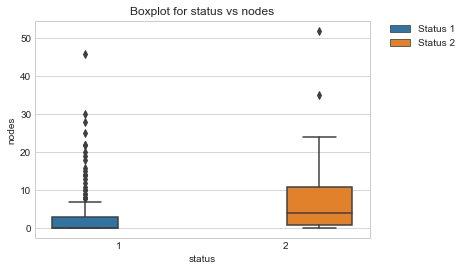

In [87]:
g = sns.boxplot(x='status',y='nodes',hue='status',data=haberman)
handles, _ = g.get_legend_handles_labels()
g.legend(handles, ["Status 1", "Status 2"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title("Boxplot for status vs nodes")
plt.show()

<b>Observations:</b><br>1. In boxplot 1 values of 25th and 50th percentile are 0 while the value of 75th percentile is 3. This shows that 75% of people who survived for 5 or more years had number of nodes equal to or less than 3. Further, around 90 percent of patients in this category had total number of nodes equal to or less than 8.<br><br>2. In boxplot 2 the 25th percentile is 1 ,50th percentile is 4 while 75th percentile is 11. From this boxplot we can observe that most of the patients who died within 5 years had higher threshold number of nodes as compared to boxplot 1 i.e around 75% of people had nodes equal to or less than 11 . Further around 90% of people had number of nodes equal to or less than 20 which is way higher than the upper bound of 90th percentile of patients falling under category 1.

<b><h1>Multivariate probability density,Contour plot</h1></b>

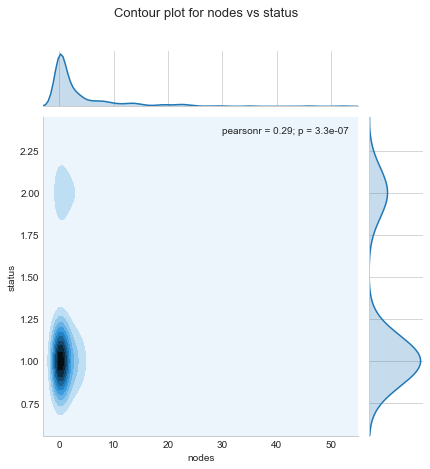

In [75]:
sns.jointplot(x="nodes", y="status", data=haberman, kind="kde");
plt.title("Contour plot for nodes vs status",x=-3,y=1.3,fontsize=13)
plt.show();

<b>Observations:</b><br>1. We see that density is high at around status 1 and nodes 0 i.e majority of the patients who have survived for 5 or more years had no nodes. We can also find that majority of patients in the given dataset have survived beyond 5 years.<br><br>2. In case of status 2 patients we see that contour plot is less dense and more sparse. This shows that there were considerably less patients who died within 5 years and there are varying number of nodes per patients.

<b><h3>Final Conclusions:</h3></b><br> 1. We do not have enough data points and features to determine a clear demarcation between category 1 and category 2 patients.<br><br>2. Through the plots above we can atleast conclude that patients who have no nodes or nodes less than 3 have higher probablity of living beyond 5 years post operation.